In [ ]:
pip install PyPortfolioOpt

In [ ]:
pip install pulp

In [402]:
from pandas_datareader import data as web
import pandas as pd
import math 
import statistics as st
import numpy as np
import random as rd
from matplotlib import pyplot as plt 
import seaborn as sns
from datetime import datetime
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 1.Créer le portfolio fictif:

In [403]:
#30 actions:
assets= [ 'AAPL' , 'NKE' , 'BA' , 'DIS' , 'SBUX' , 'AMZN' , 'GOOGL' , 'MCD' , 'ADS'   , 'F' , 'TM' 
         , 'HMC' , 'SPOT' , 'FB' , 'WMT' , 'MSFT' , 'MPC' , 'BAC' , 'IBM' , 'C' , 'JPM' ,  'HPQ' 
         , 'GM' , 'PEP' , 'CSCO' , 'NFLX' ,'ORCL','KO', 'PYPL', 'MA']
#obtenir la date de début de stock
date_debut = '2019-01-01'
#Obtenez la date de fin de stock de la date d'aujourd'hui et formatez-la sous la forme AAAA-MM-JJ
aujourd_hui = datetime.today().strftime('%Y-%m-%d')
data = pd.DataFrame()
#Mémorisation du cours de clôture ajusté du stock dans le bloc de données
for act in assets:
    data[act] = web.DataReader(act,data_source='yahoo',start=date_debut , end=aujourd_hui)['Adj Close']

In [404]:
data.head()

,AAPL,NKE,BA,DIS,SBUX,AMZN,GOOGL,MCD,ADS,F,...,JPM,HPQ,GM,PEP,CSCO,NFLX,ORCL,KO,PYPL,MA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,154.794983,72.899254,314.645142,107.654343,62.488483,1539.130005,1054.680054,169.710464,150.782410,7.284280,...,94.704803,19.571196,31.893360,104.607376,41.075611,267.660004,44.055454,44.687187,85.750000,188.147675
2019-01-03,139.376251,71.609787,302.100555,105.046211,59.777924,1500.280029,1025.469971,168.592285,146.968689,7.173633,...,93.358879,18.907122,30.575533,103.630989,39.581779,271.200012,43.626789,44.411045,82.089996,179.659485
2019-01-04,145.326126,73.480011,317.822601,108.286606,61.759838,1575.390015,1078.069946,171.850388,156.915405,7.450252,...,96.800606,19.656574,31.599455,105.756058,41.364738,297.570007,45.507084,45.296597,86.269997,188.167480
2019-01-07,145.002686,74.533249,318.823395,109.225136,61.759838,1629.510010,1075.920044,173.720444,156.905685,7.643884,...,96.867889,19.874773,32.575977,104.846680,41.644226,315.339996,46.228024,44.706234,86.930000,189.615234
2019-01-08,147.766861,75.527420,330.891937,110.074753,61.808411,1656.579956,1085.369995,174.086731,159.632538,7.717649,...,96.685234,20.121428,33.002617,105.851791,41.981548,320.269989,46.646957,45.210903,88.699997,190.995941


In [405]:
M=[]
N=[]
for i in data.columns:
    a=st.mean(data[i][1:])
    M.append([a])
    N.append(a)
    dic={k:v for k, v in zip(data.columns,M)}
    data_moy=pd.DataFrame(dic)
data_moy=data_moy.T.sort_values(by=0,ascending = False).T

In [406]:
action5=[]
L=[i for i in data_moy.columns]
a=0
for i in range(5,len(L)+1,5):
    action5.append(L[a:i])
    a=i

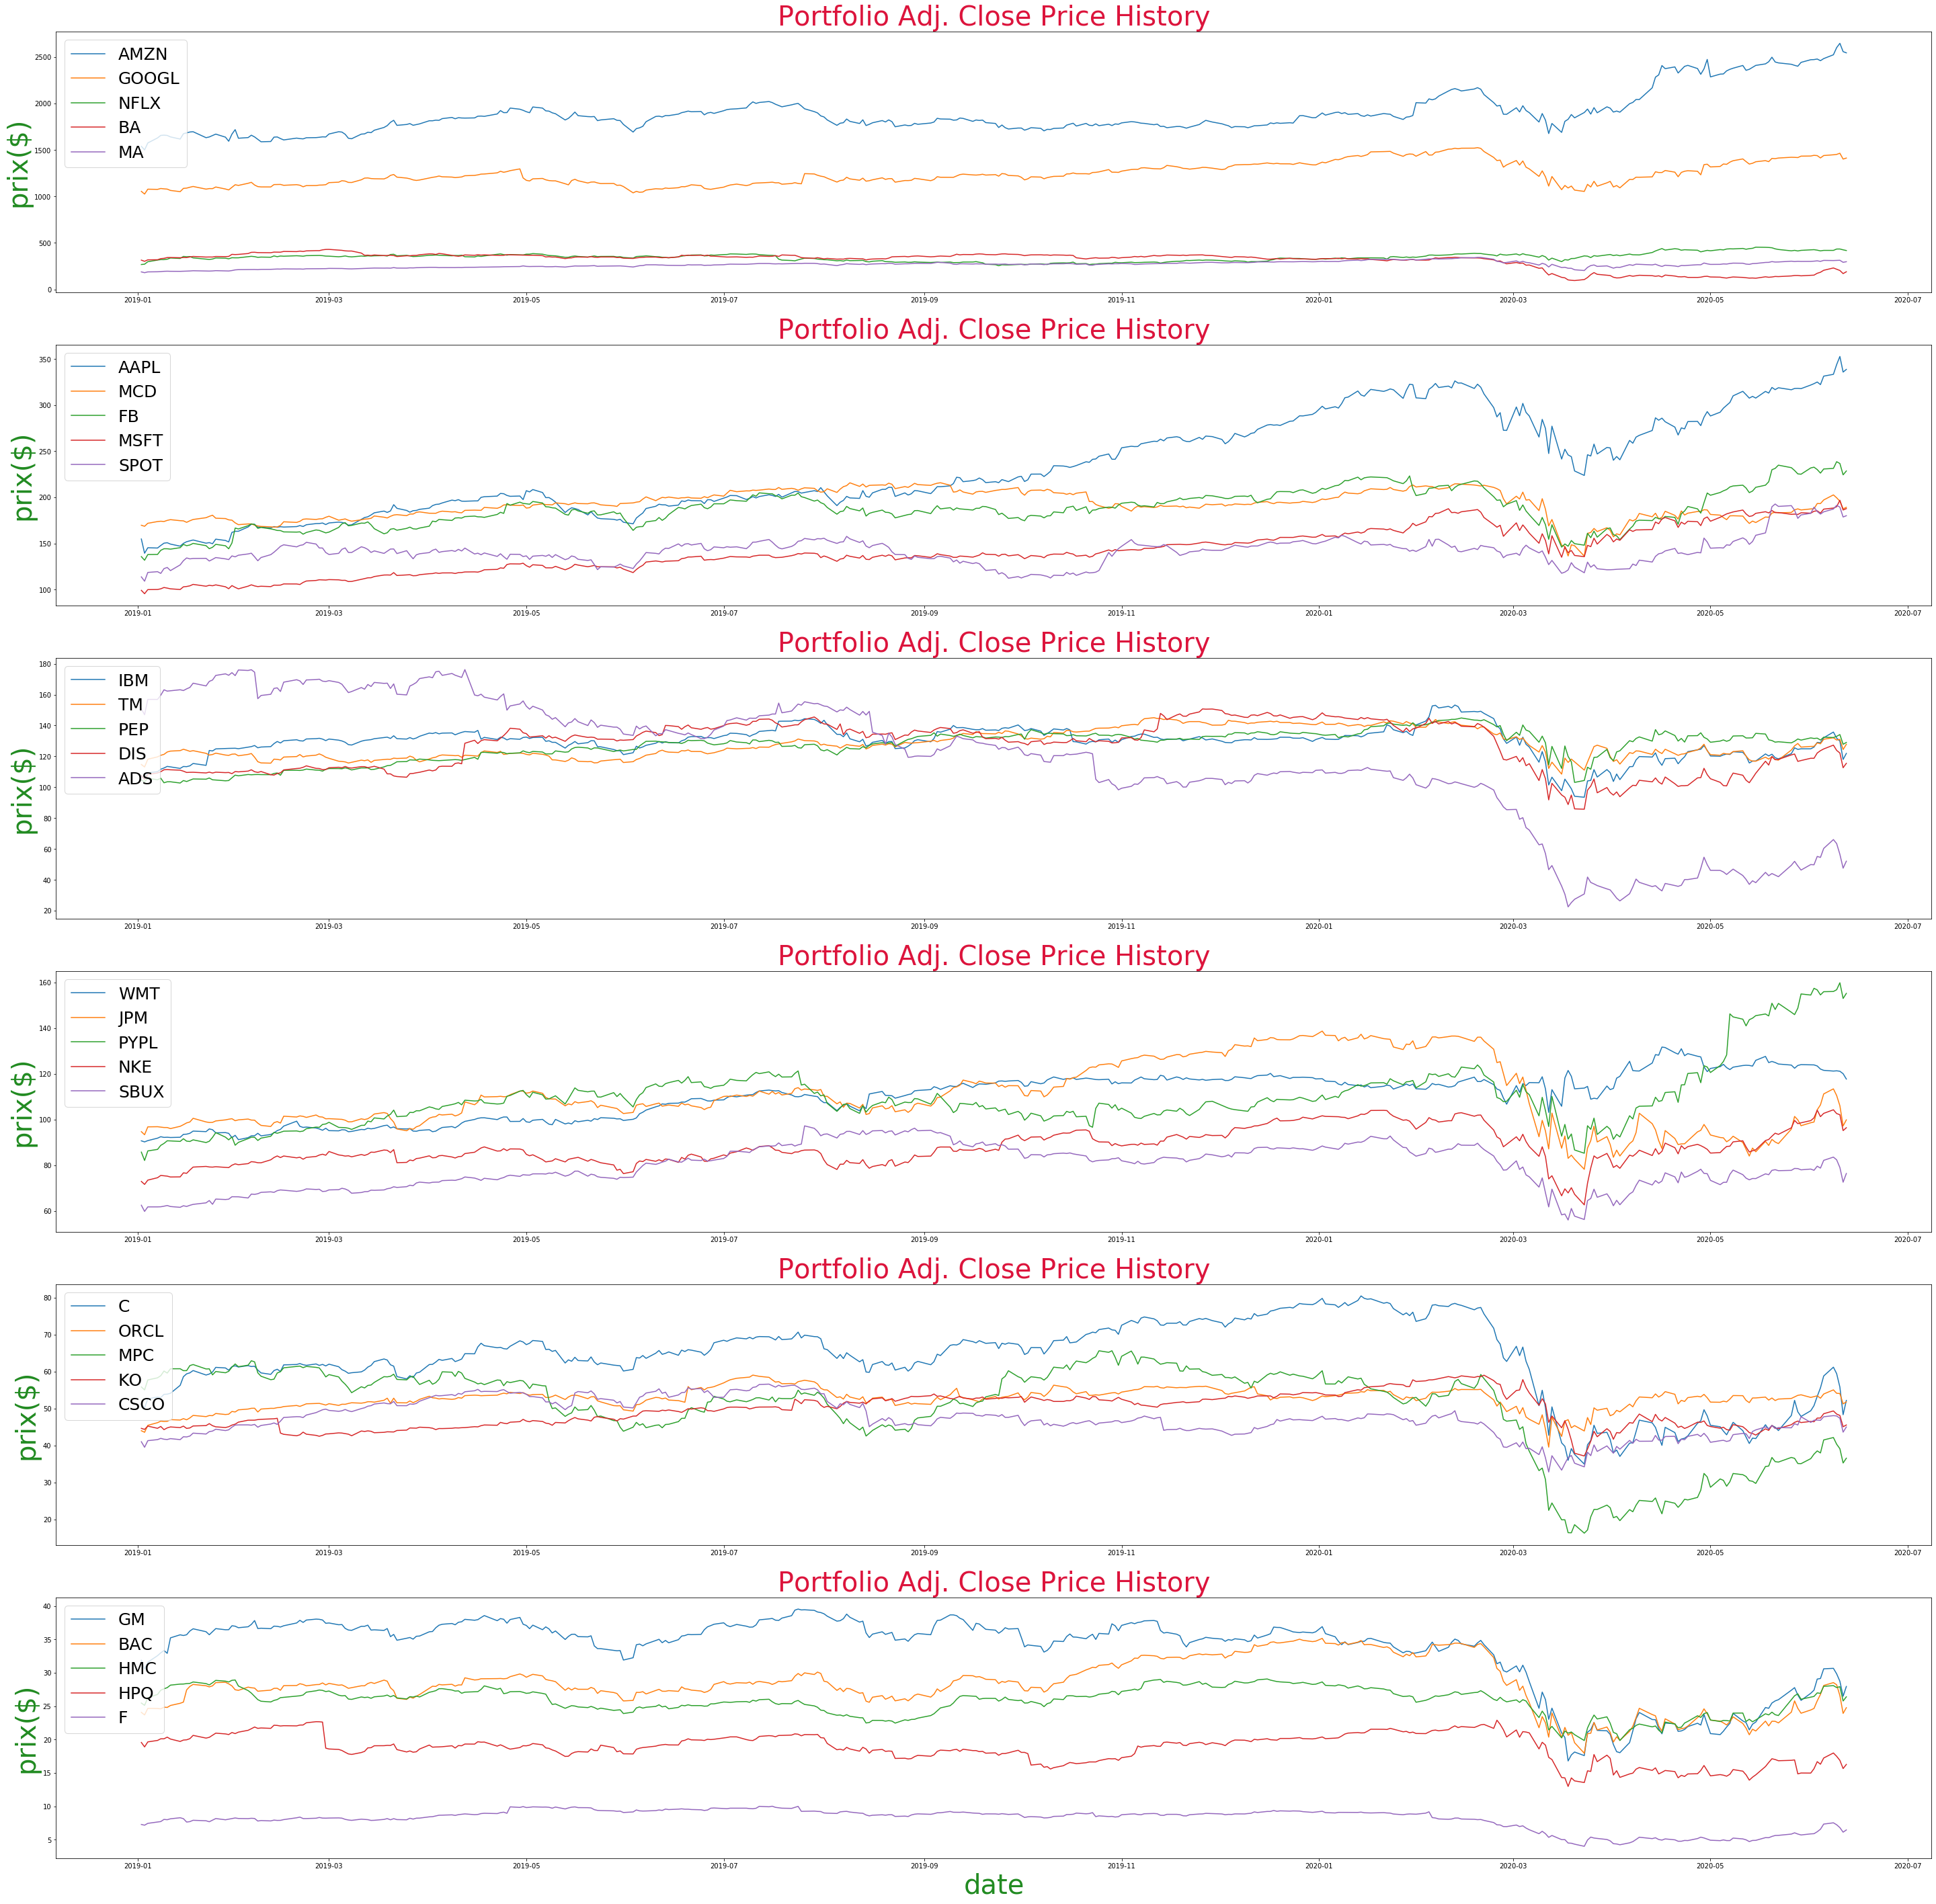

In [434]:
plt.figure(figsize=(50,50))
for i,s in enumerate(range(len(action5))) :
    mon_stocks_columns= action5[s]
    plt.subplot(len(action5),1,i+1)
    for c in mon_stocks_columns :
        plt.plot(data[c],label=c)
    plt.legend(loc='upper left',fontsize=25)
    plt.title('Portfolio Adj. Close Price History'
              ,fontsize=40,c='#DC143C')
    plt.ylabel('prix($)',fontsize=40,c='#228B22')
plt.xlabel('date',fontsize=40,c='#228B22')
plt.savefig('prixAction1.png')
plt.show()

# 2. Calculs financiers:

In [408]:
def rentabilite(data):
    L_rentabilite=[None]
    for i in range(1,len(data)):
        r=(data[i]-data[i-1])/data[i-1]
        L_rentabilite.append(r)
    return L_rentabilite

In [409]:
K=[rentabilite(data[j]) for j in data.columns]
dic={k:v for k, v in zip(data.columns,K)}
tab_re=pd.DataFrame(dic,index=data.index)
tab_re.head()

,AAPL,NKE,BA,DIS,SBUX,AMZN,GOOGL,MCD,ADS,F,...,JPM,HPQ,GM,PEP,CSCO,NFLX,ORCL,KO,PYPL,MA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.017688,-0.039869,-0.024227,-0.043377,-0.025242,-0.027696,-0.006589,-0.025293,-0.01519,...,-0.014212,-0.033931,-0.041320,-0.009334,-0.036368,0.013226,-0.009730,-0.006179,-0.042682,-0.045115
2019-01-04,0.042689,0.026117,0.052042,0.030847,0.033155,0.050064,0.051294,0.019325,0.067679,0.03856,...,0.036866,0.039639,0.033488,0.020506,0.045045,0.097234,0.043100,0.019940,0.050920,0.047356
2019-01-07,-0.002226,0.014334,0.003149,0.008667,0.000000,0.034353,-0.001994,0.010882,-0.000062,0.02599,...,0.000695,0.011101,0.030903,-0.008599,0.006757,0.059717,0.015842,-0.013033,0.007650,0.007694
2019-01-08,0.019063,0.013339,0.037853,0.007779,0.000786,0.016612,0.008783,0.002108,0.017379,0.00965,...,-0.001886,0.012410,0.013097,0.009586,0.008100,0.015634,0.009062,0.011289,0.020361,0.007282


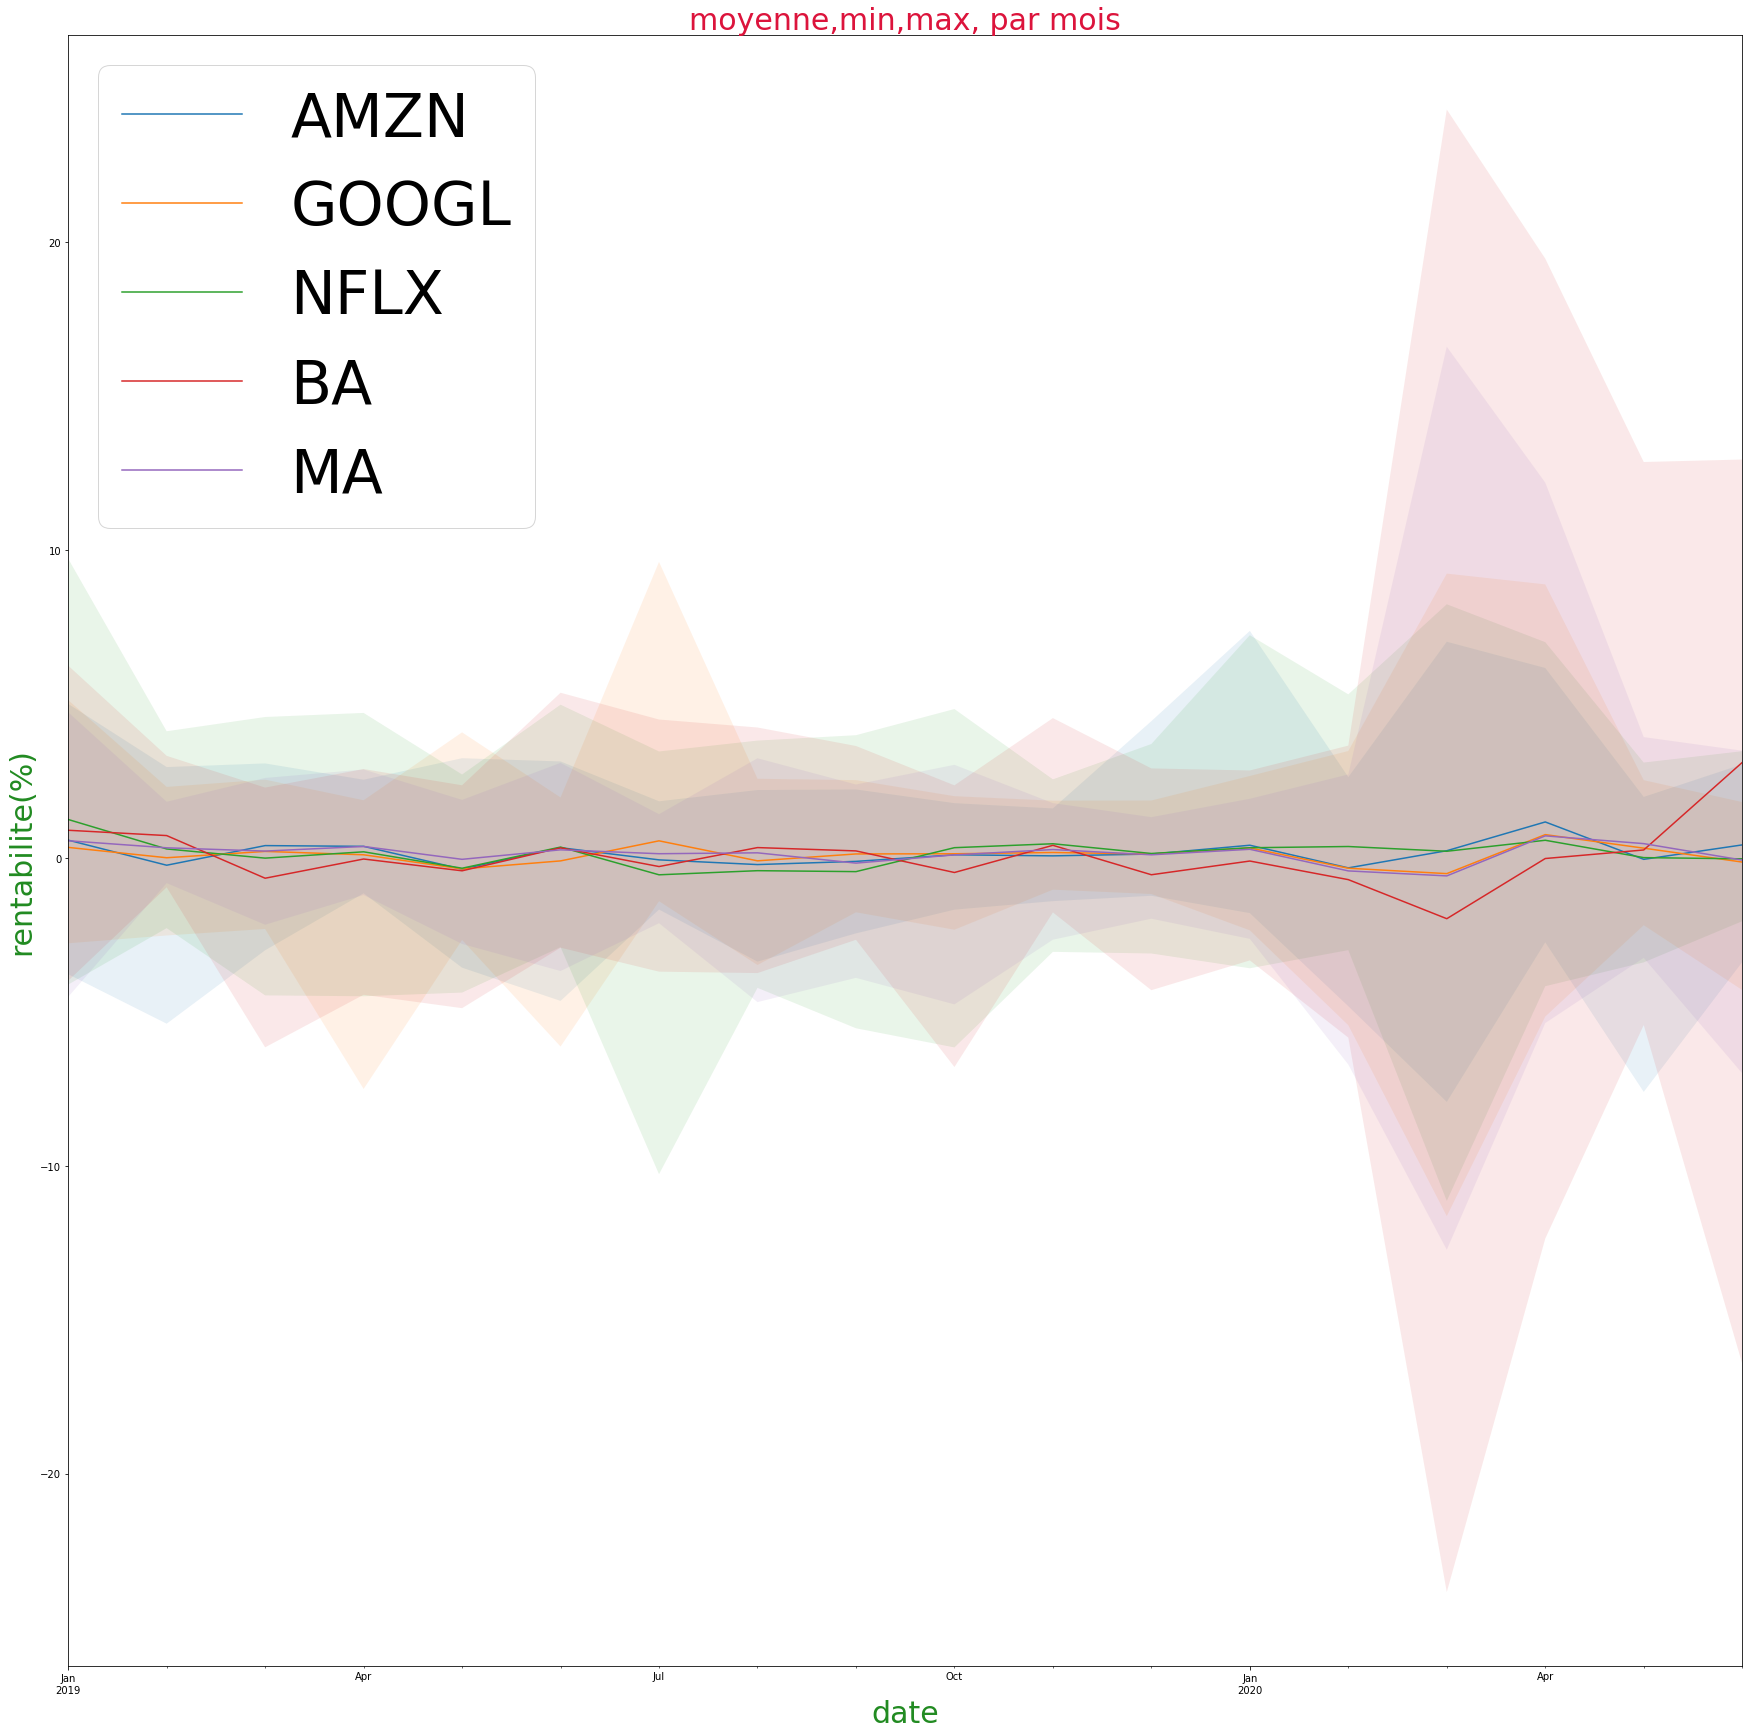

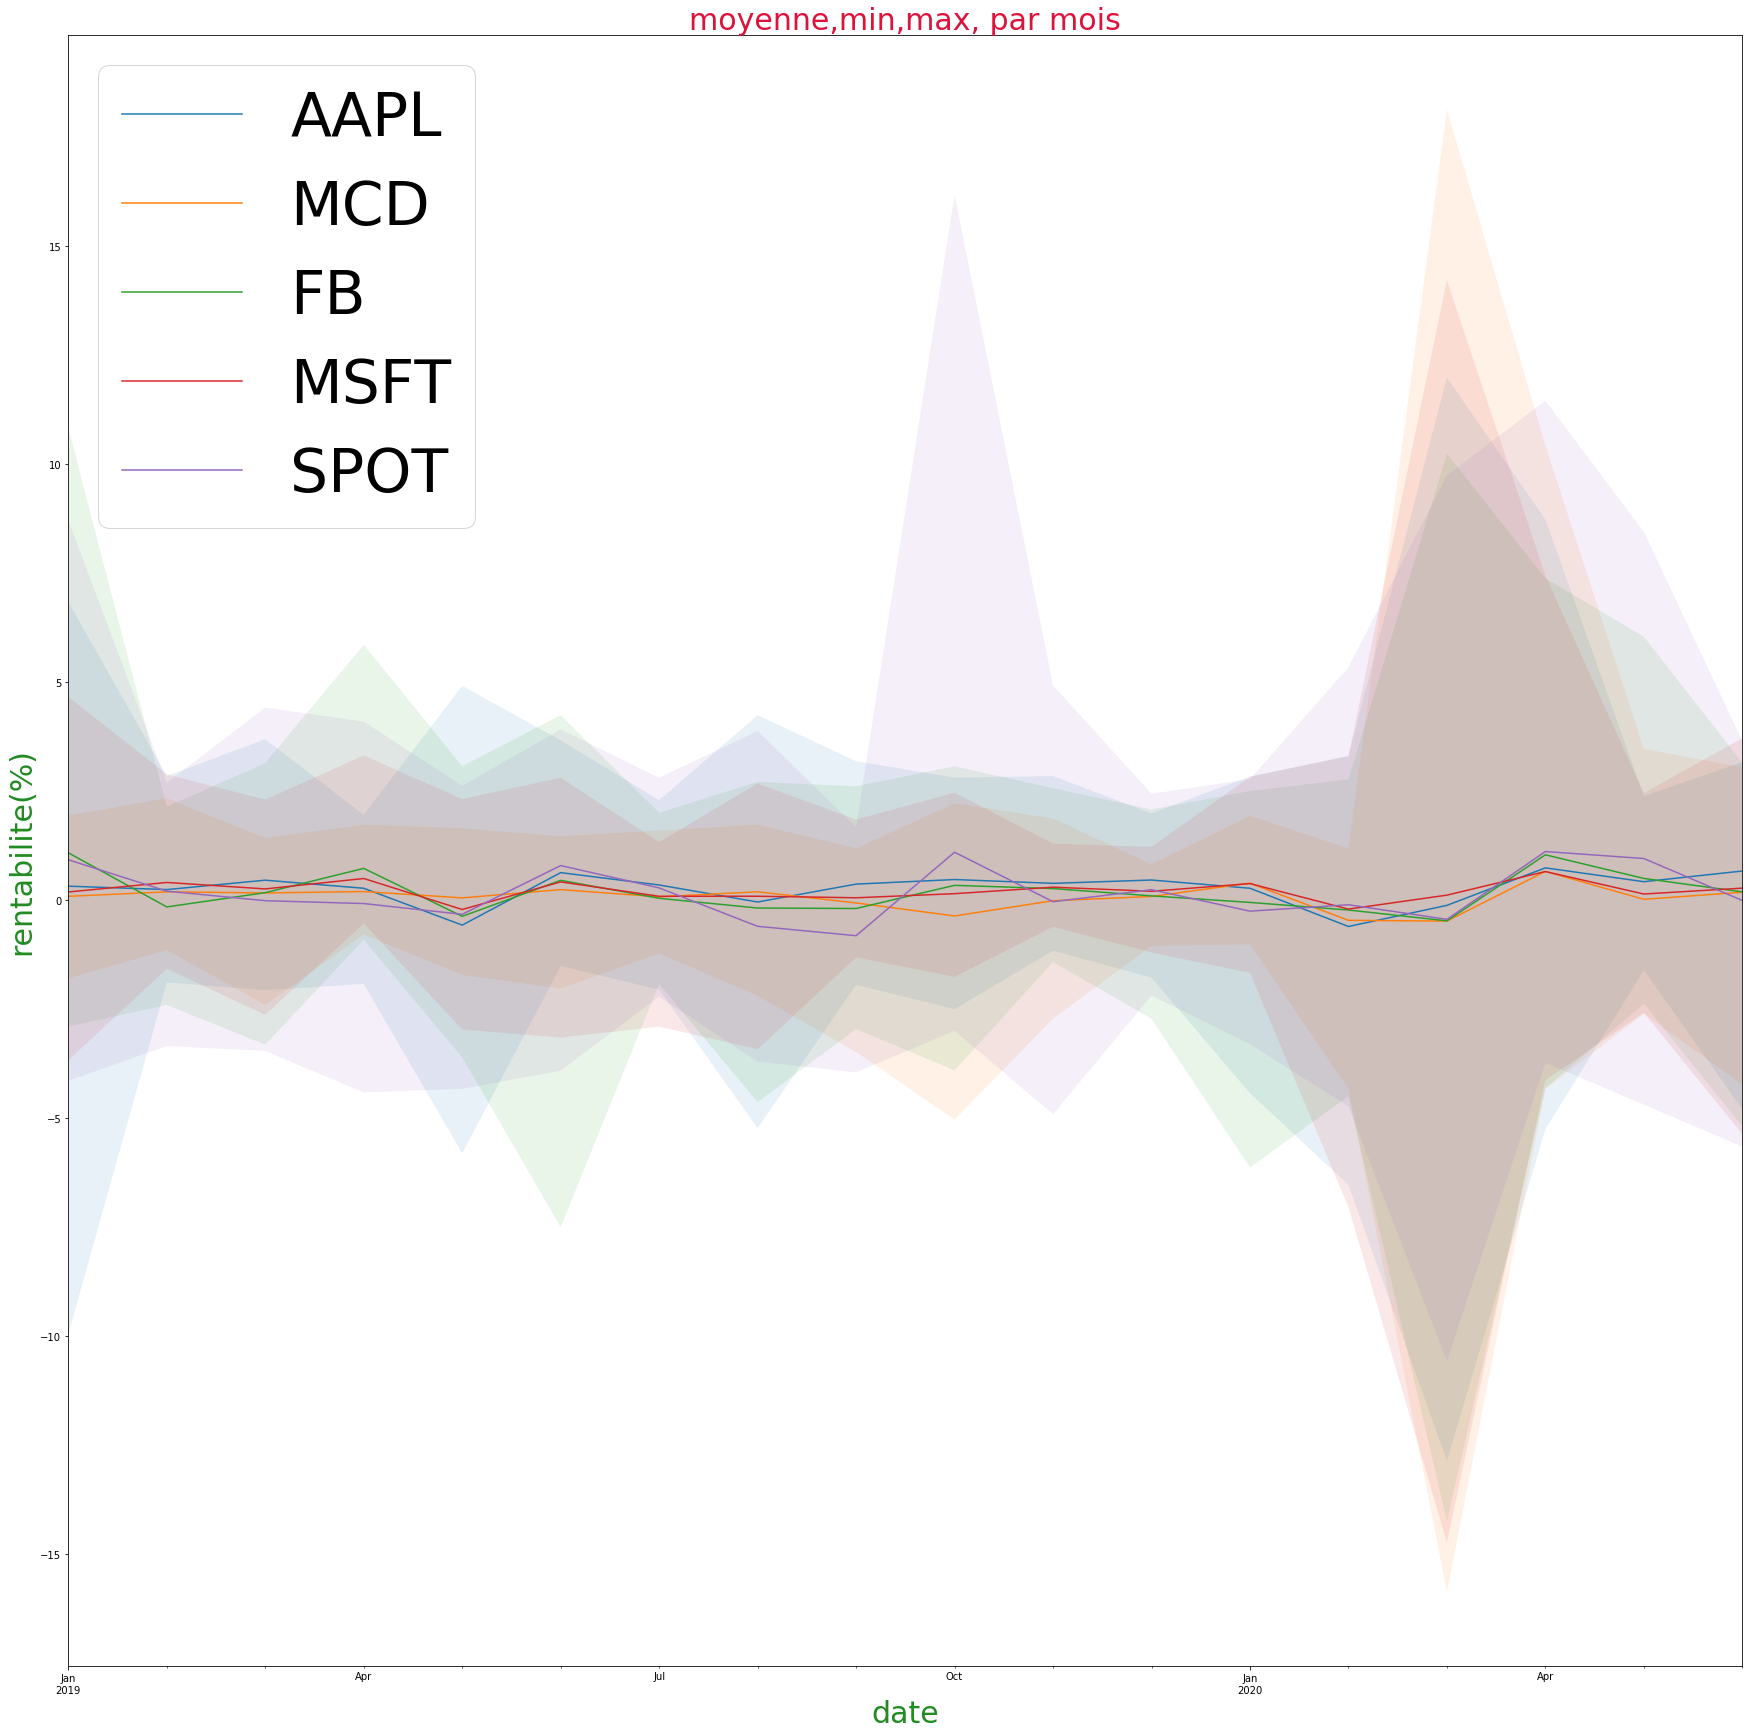

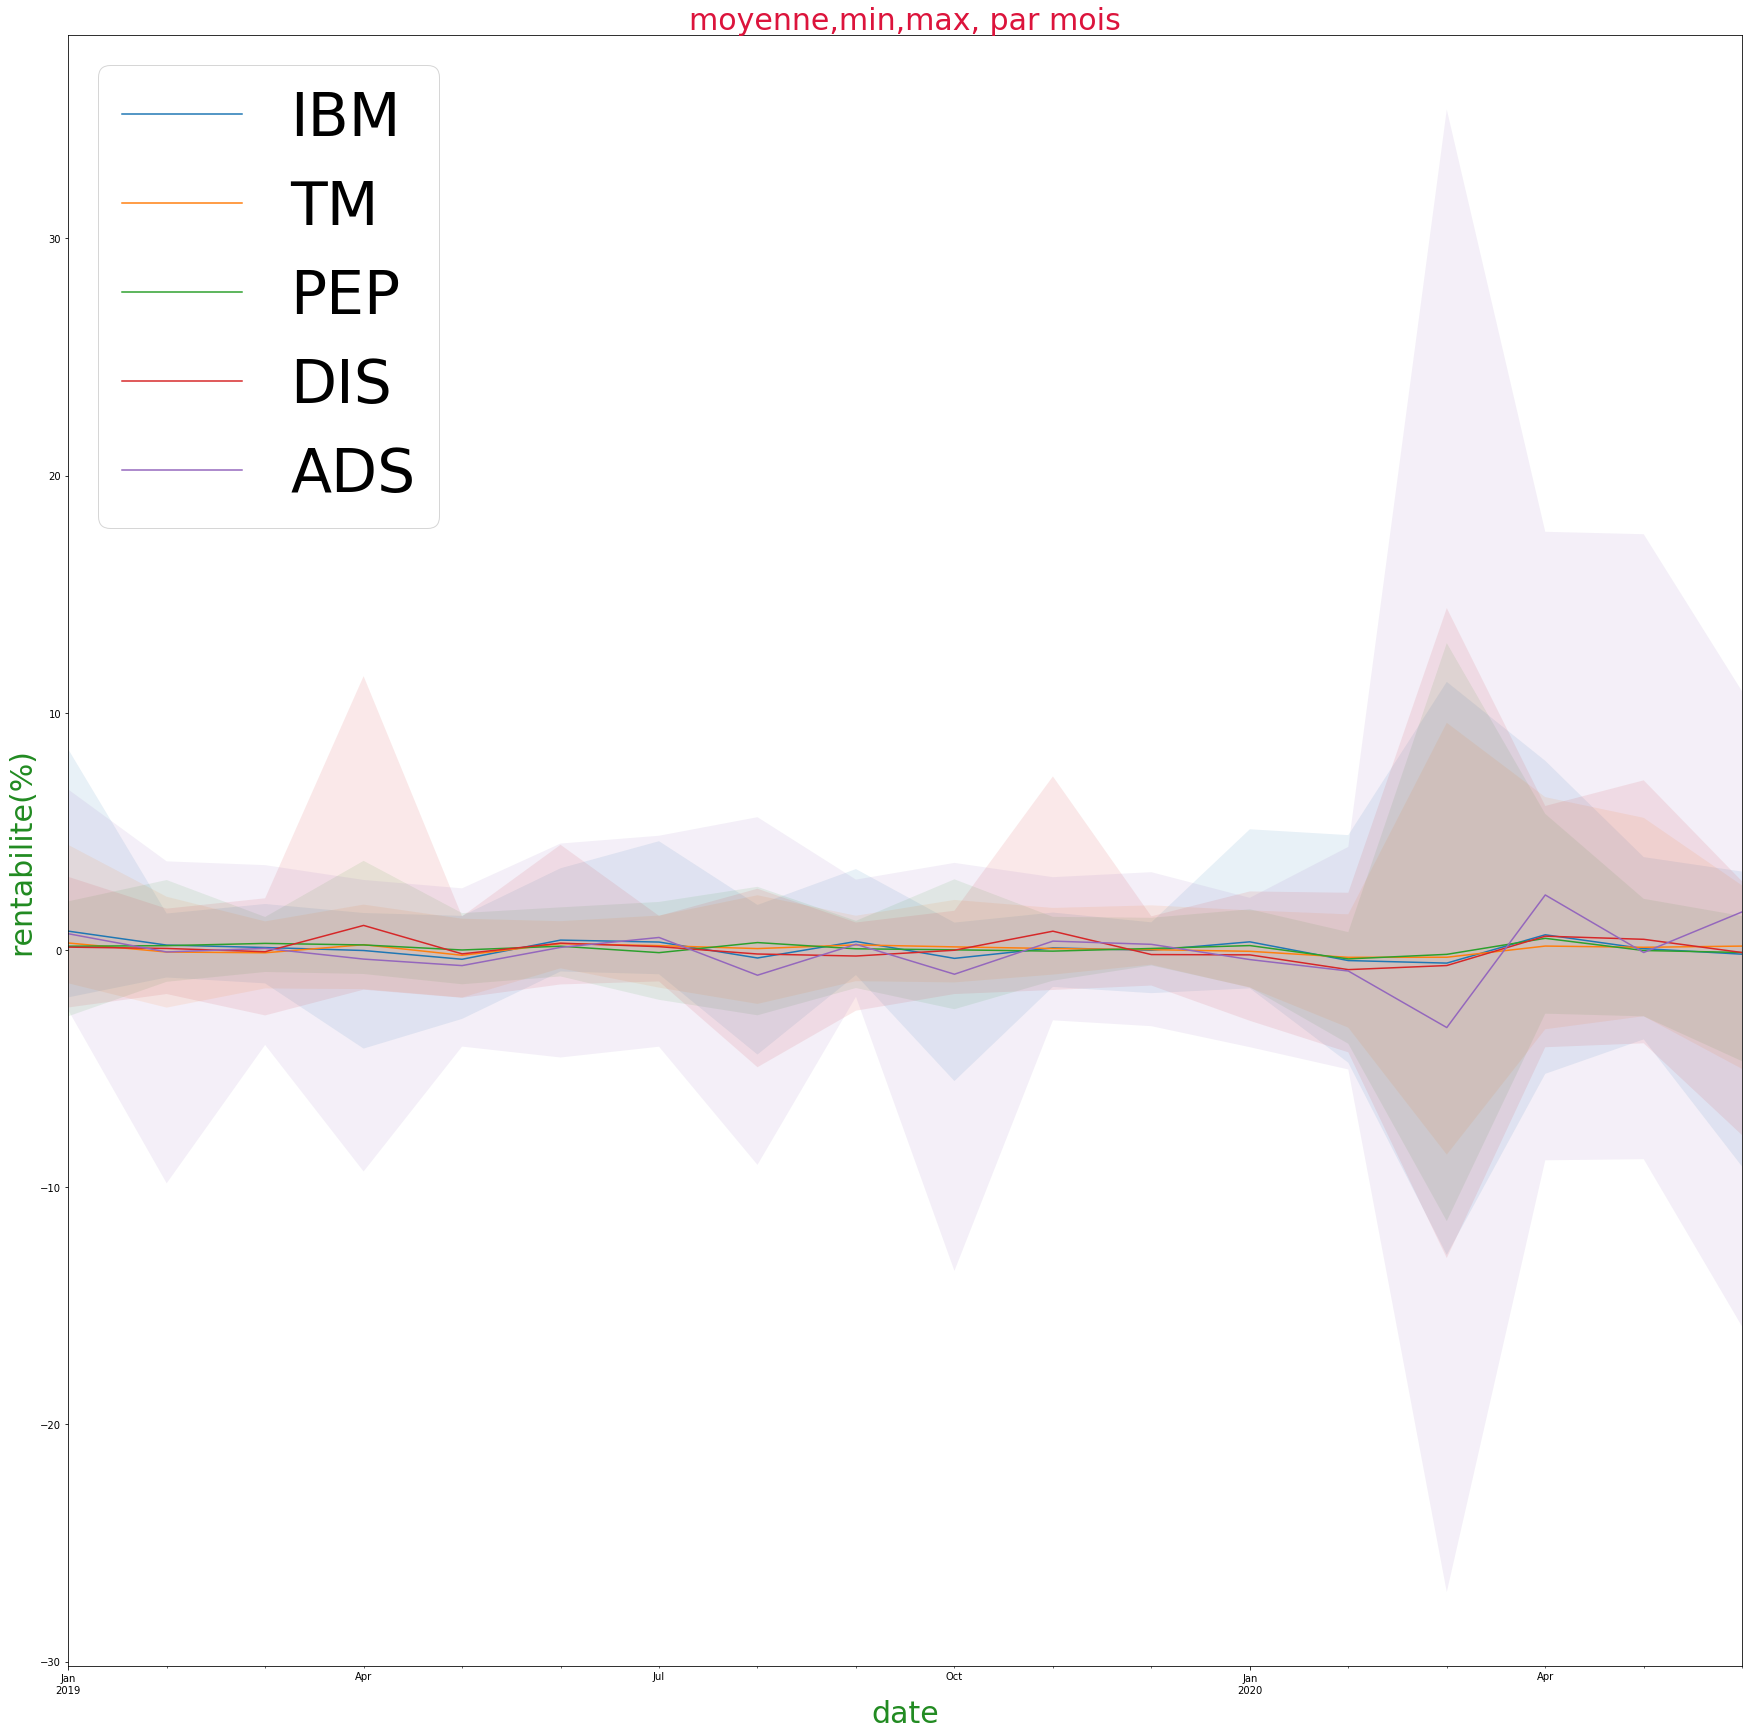

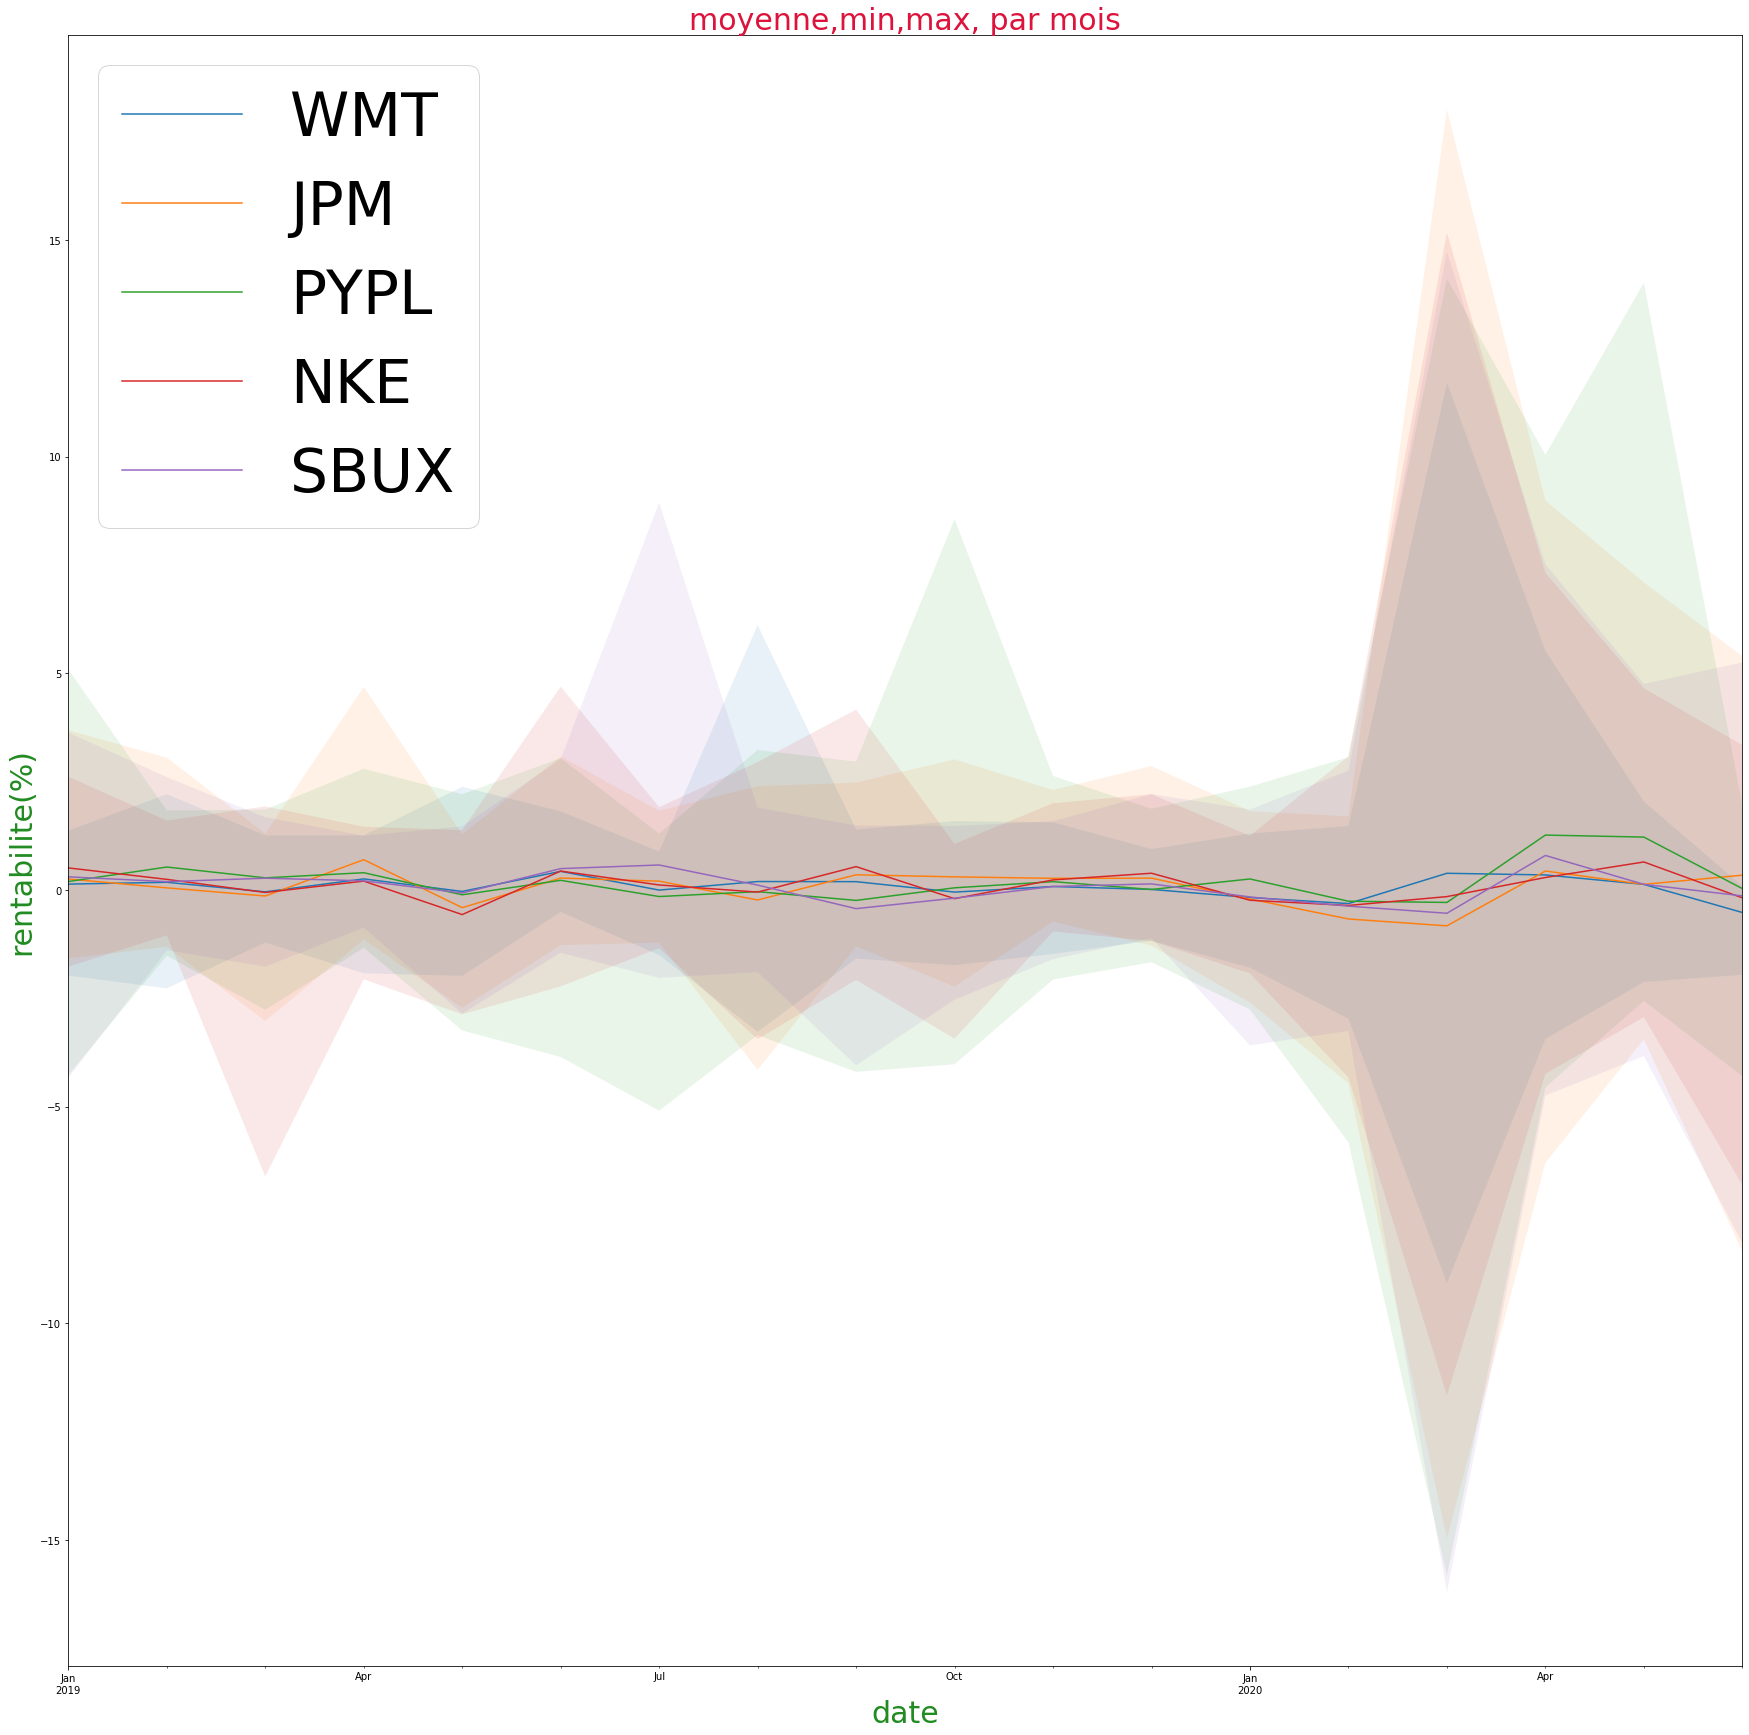

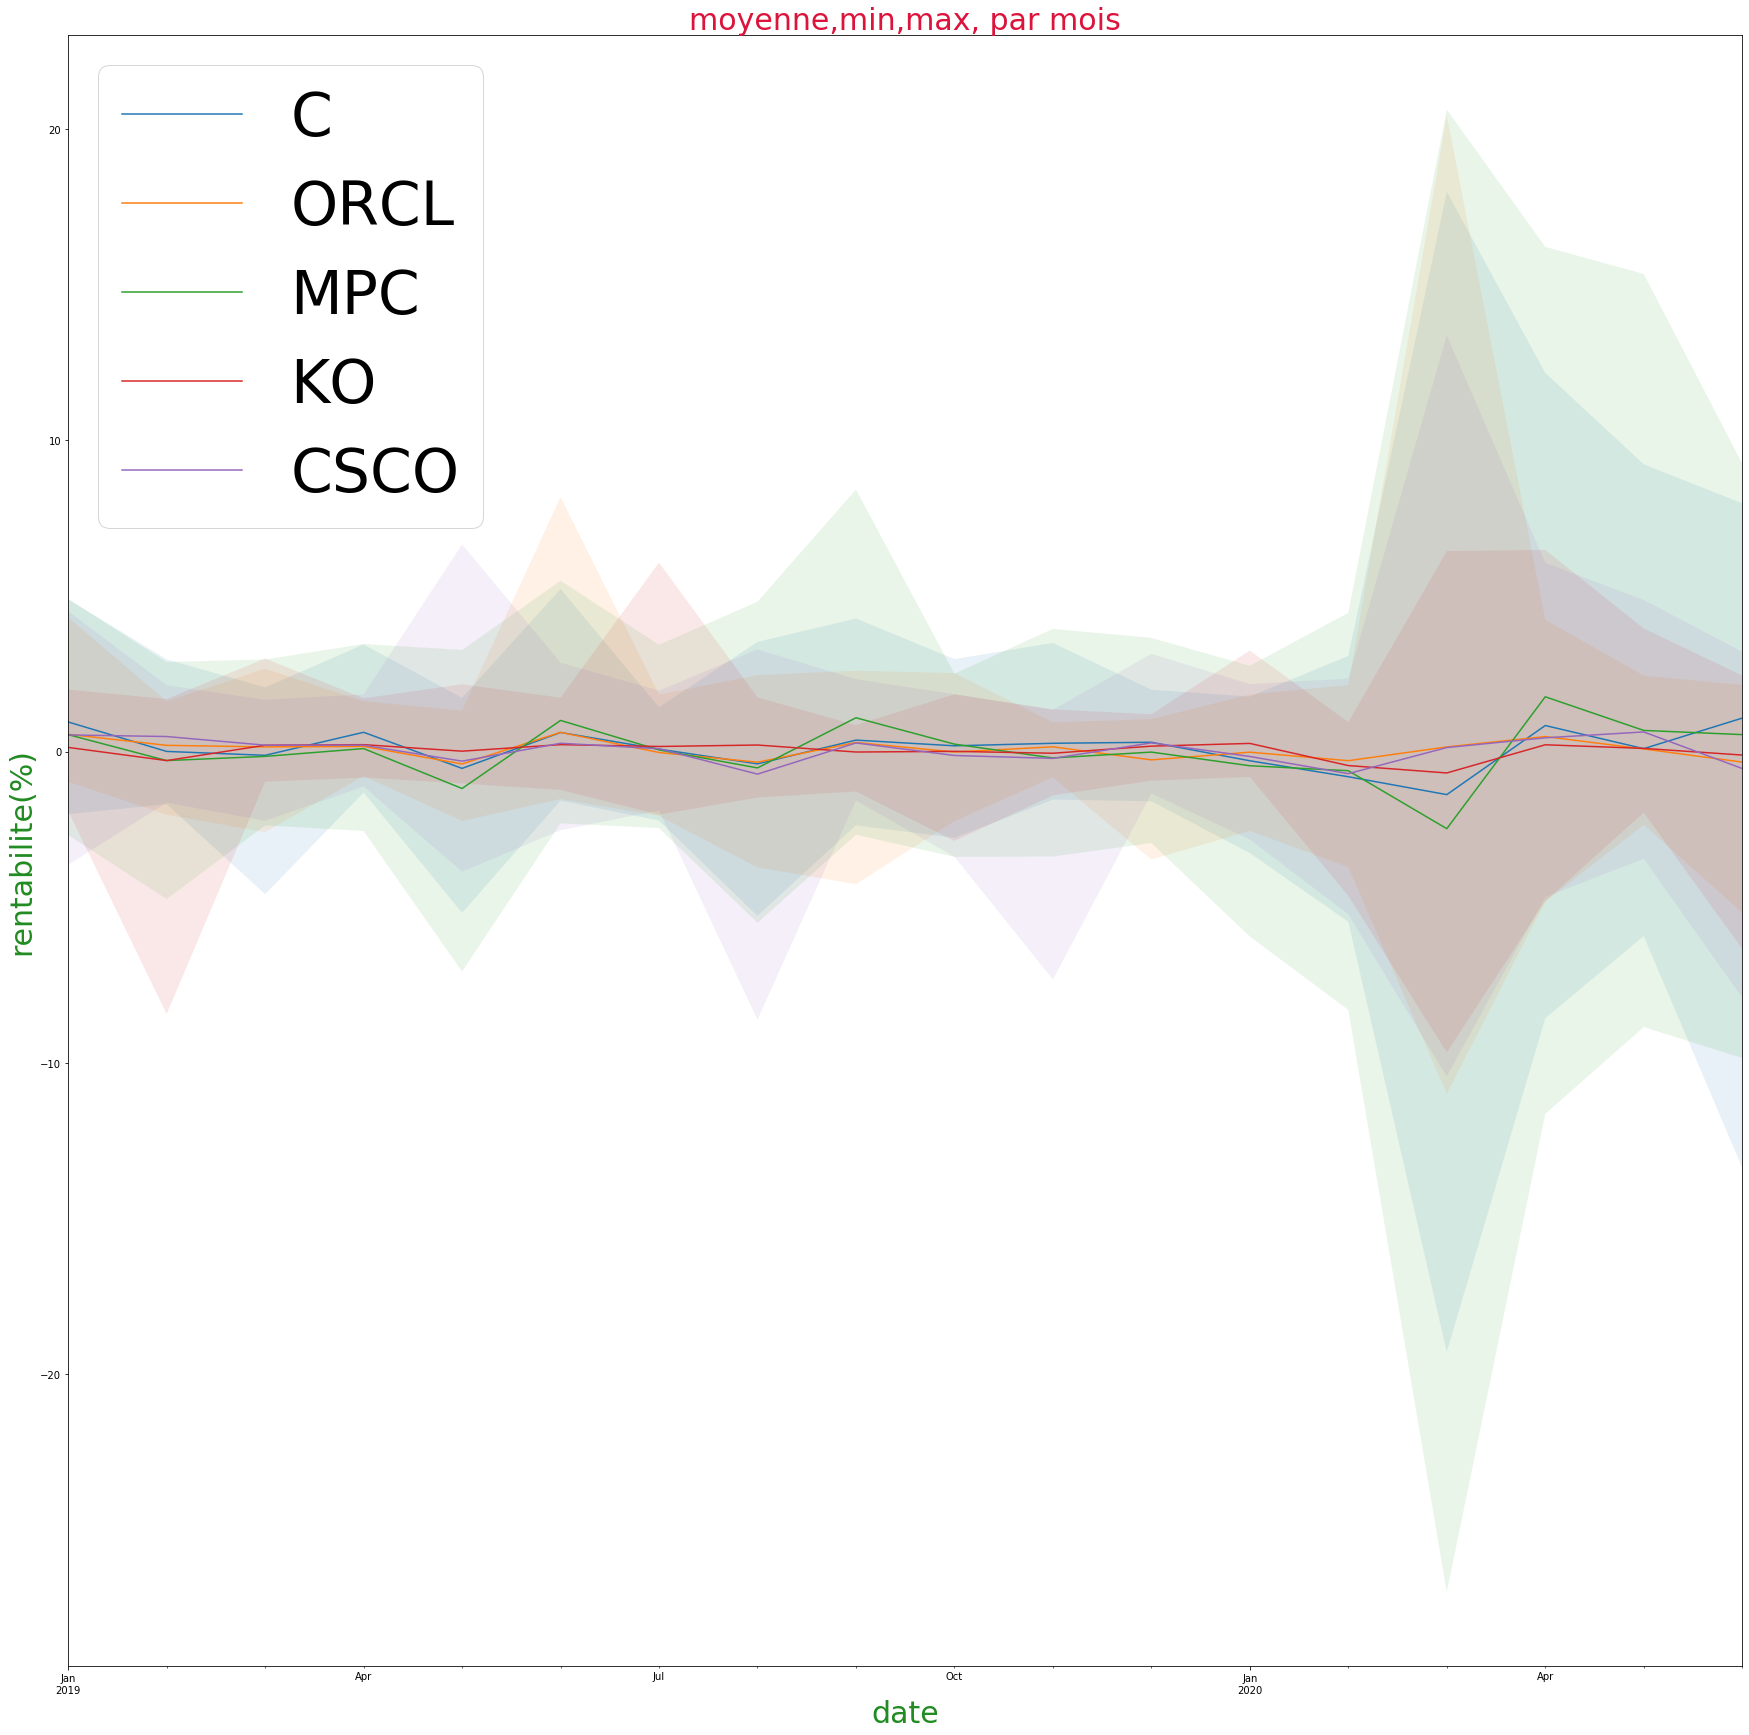

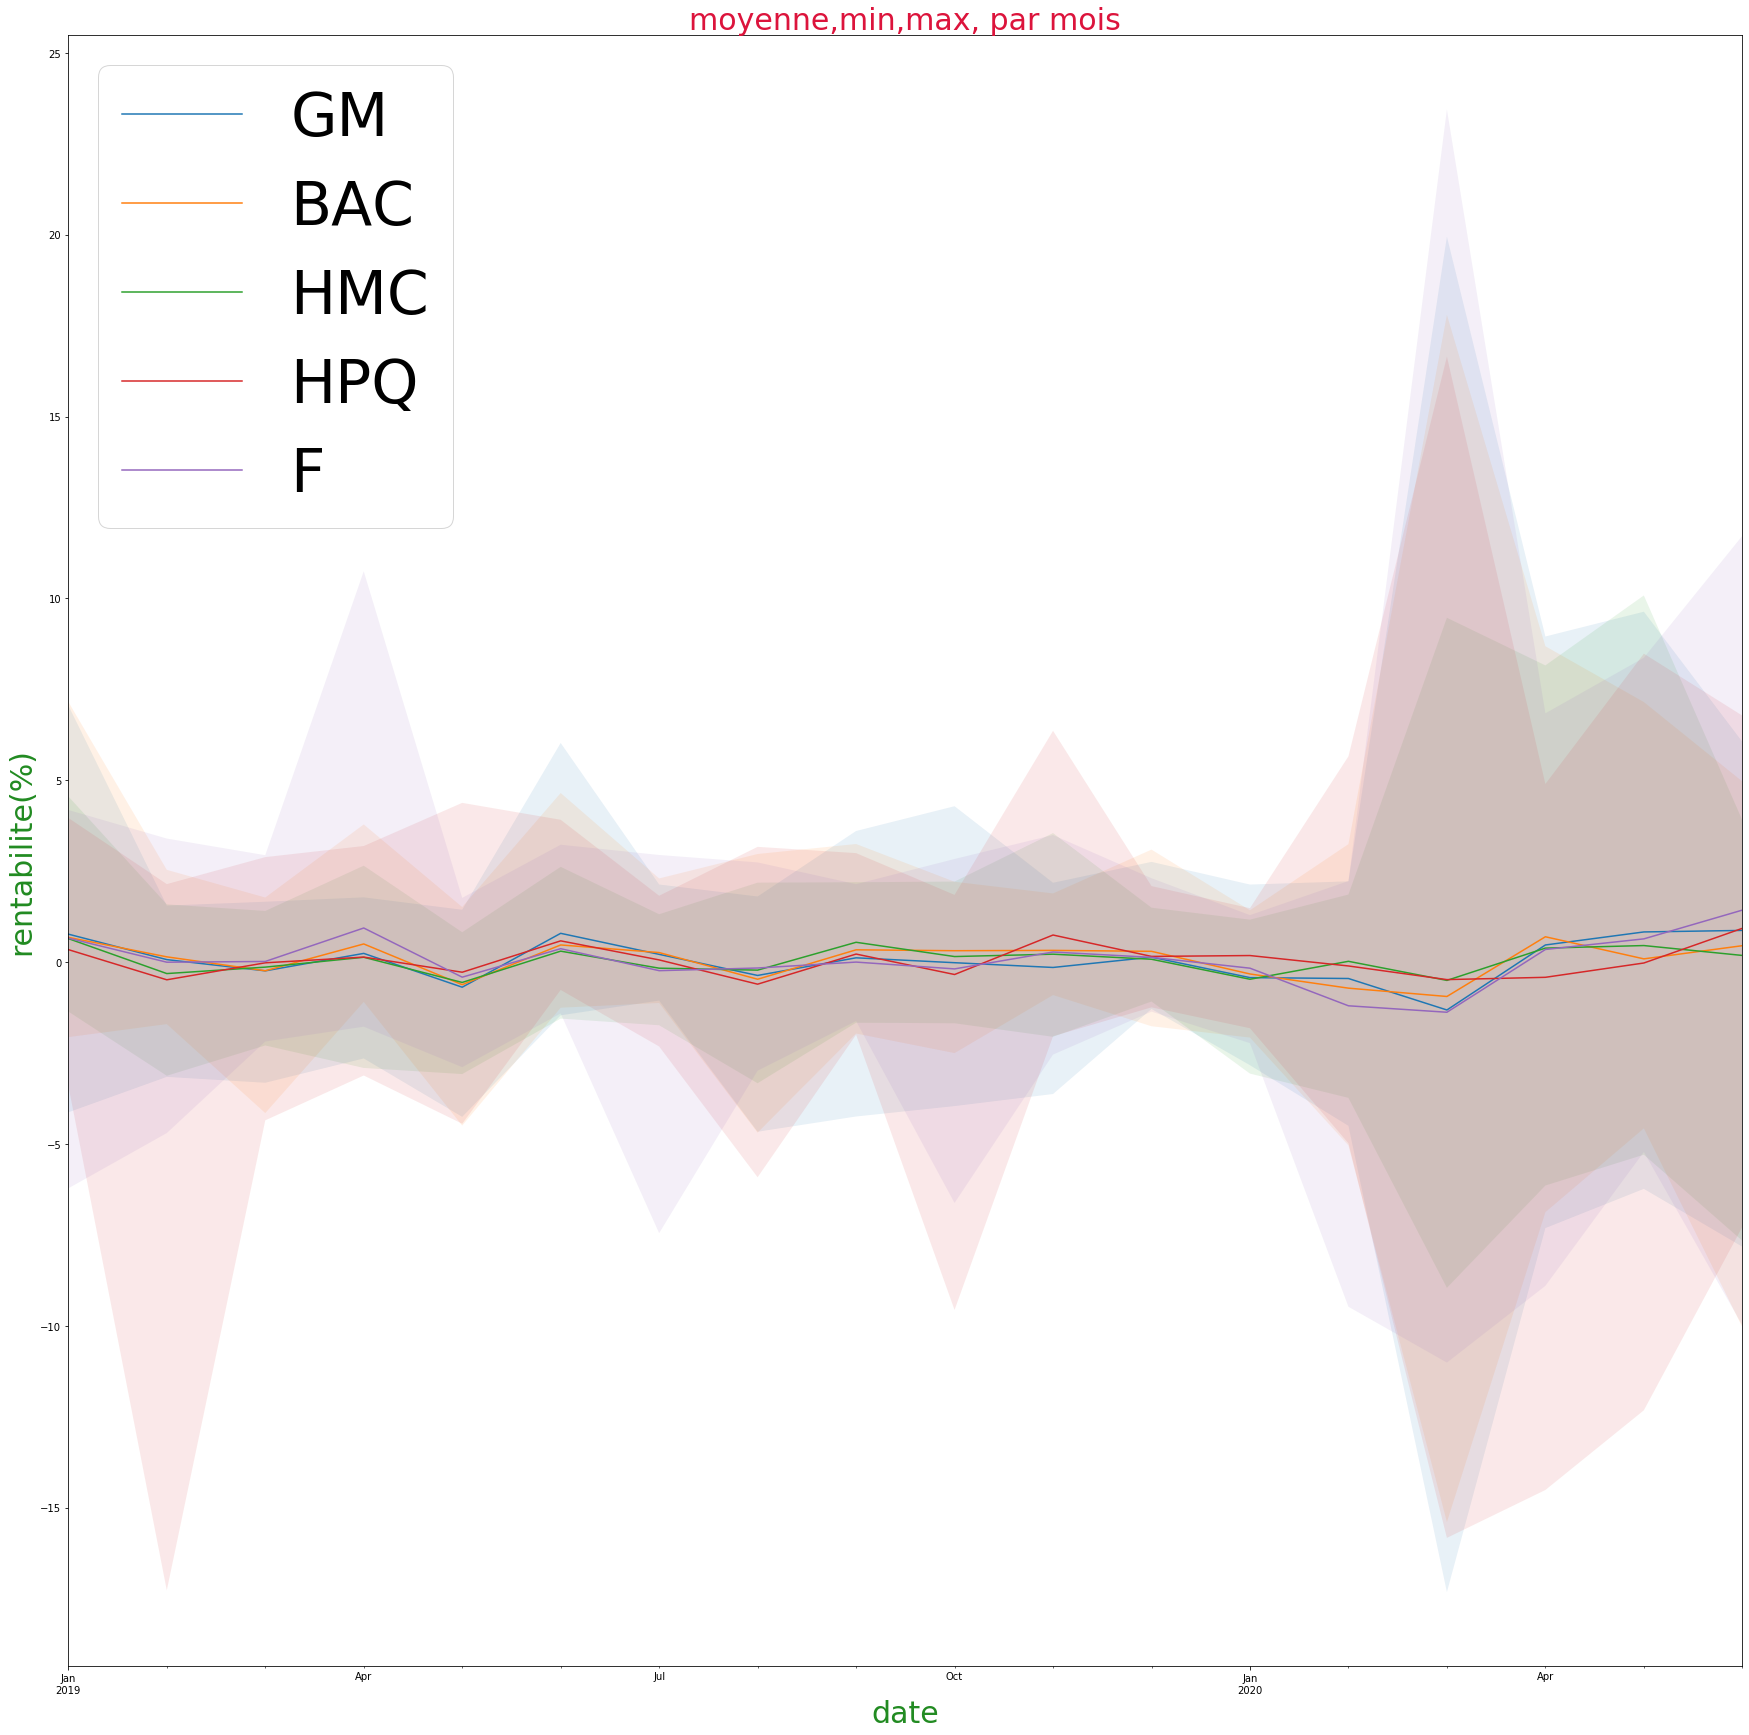

In [433]:

for i,s in enumerate(range(len(action5))) :
    plt.figure(figsize=(30,30))
    mon_stocks_columns= action5[s]
    for c in mon_stocks_columns :
        percent_re=tab_re[c]*100
        p=percent_re.resample('M').agg(['mean','min','max'])
        p['mean'][:].plot(label=c)
        plt.fill_between(p.index, p['max'],p['min'],alpha=0.1)
    plt.legend(loc='upper left',fontsize=60)
    plt.title('moyenne,min,max, par mois'
              ,fontsize=30,c='#DC143C')
    plt.xlabel('date',fontsize=30,c='#228B22')
    plt.ylabel('rentabilite(%)',fontsize=30,c='#228B22')
    plt.savefig(f'rentabiliteGroup{i}.png')
    plt.show()

In [432]:
corr=np.corrcoef(tab_re.iloc[1:,:].T )
corr=pd.DataFrame(corr,index=tab_re.columns,columns=tab_re.columns)
corr.head()

,AAPL,NKE,BA,DIS,SBUX,AMZN,GOOGL,MCD,ADS,F,...,JPM,HPQ,GM,PEP,CSCO,NFLX,ORCL,KO,PYPL,MA
AAPL,1.000000,0.677975,0.509493,0.606659,0.680278,0.665740,0.775794,0.598312,0.423840,0.513063,...,0.659565,0.553301,0.587366,0.674689,0.735573,0.518753,0.684846,0.577517,0.730610,0.756242
NKE,0.677975,1.000000,0.604899,0.667075,0.735922,0.468773,0.638666,0.744094,0.514005,0.682130,...,0.703601,0.630903,0.676343,0.616282,0.682601,0.343182,0.601851,0.636595,0.618558,0.765584
BA,0.509493,0.604899,1.000000,0.593436,0.616164,0.310183,0.492894,0.587921,0.642895,0.619417,...,0.679120,0.516891,0.667865,0.442789,0.468308,0.263275,0.466901,0.556372,0.502326,0.638978
DIS,0.606659,0.667075,0.593436,1.000000,0.734617,0.445724,0.621246,0.675980,0.574264,0.616003,...,0.736774,0.564050,0.665824,0.576417,0.648459,0.284387,0.558166,0.584622,0.630467,0.733721
SBUX,0.680278,0.735922,0.616164,0.734617,1.000000,0.467301,0.688507,0.810515,0.582399,0.631405,...,0.729348,0.601683,0.676522,0.668400,0.686989,0.358842,0.651703,0.611591,0.728185,0.781380


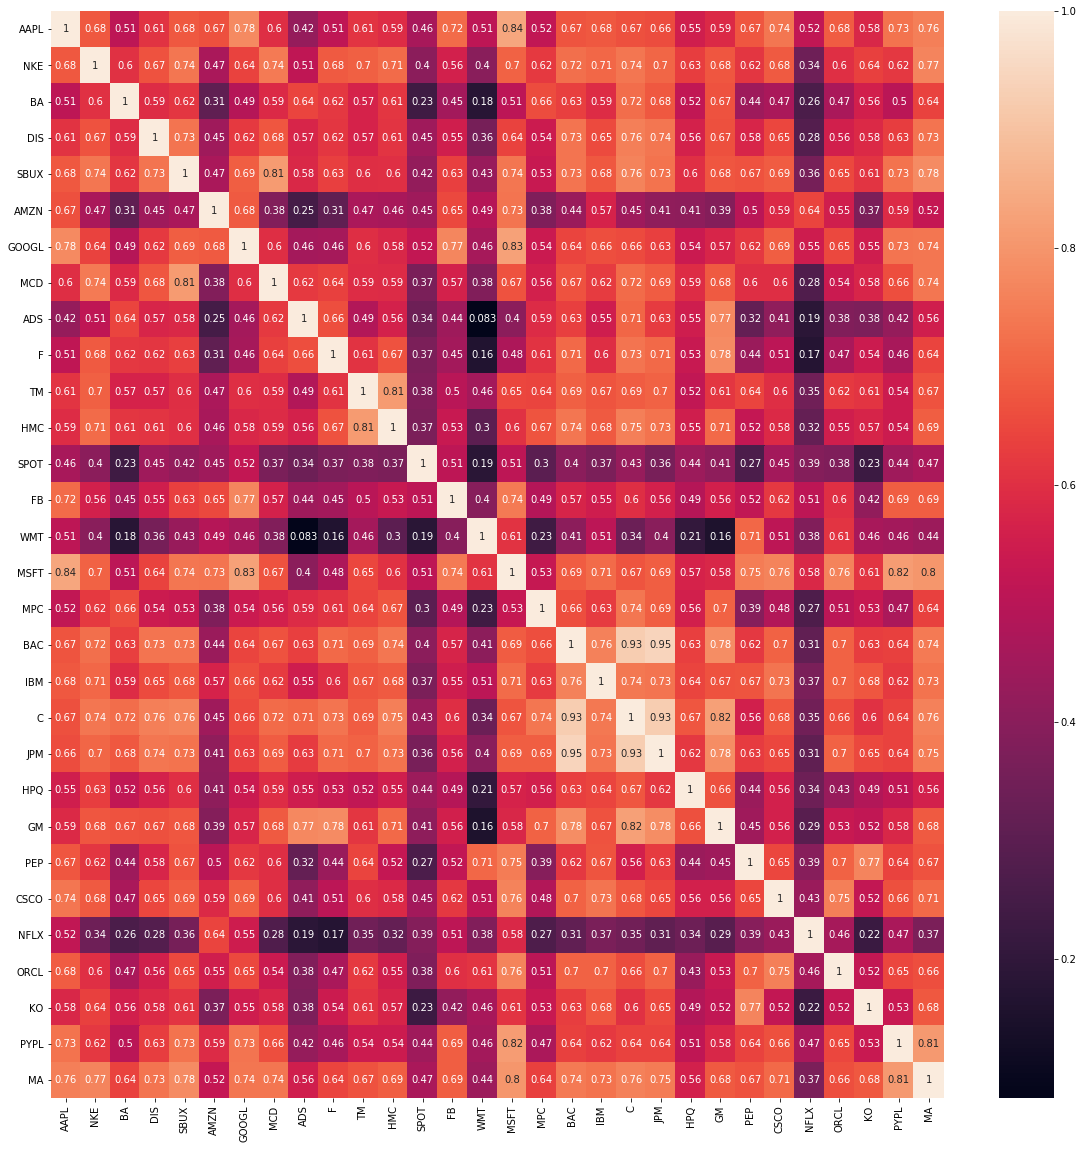

In [412]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.savefig('corr.png')
plt.show()

In [413]:
liste_portefeuille=[]
dic_action={k:v for k,v in zip(range(len(data)),data.columns)}
try:
    n=int(input('donner le nombre des portefeuilles :'))
    print(dic_action)
    m=int(input('donner le nombre des actions dans chaque portefeuilles :'))
    if m>30 or m<1 :
        raise NameError
    for i in range(1,n+1):
        print(f'***portefeuilleN°{i}***'.center(85,'_'))
        e_liste=[]
        for j in range(0,m):
            e=int(input(f'donner le numéro du action N°{j+1} :'))
            
            if e>29 or e<0 :
                raise AssertionError
            e_liste.append(dic_action[e])
        liste_portefeuille.append(e_liste)
except AssertionError :
    print('Attention! le nombre saisi n\'est compris entre 0 et 29')
except ValueError:
    print('Attention! la valeur saisie n\'est pas un entier ') 
except NameError:
    print('Attention! en a pas de plus de 30 action')
else:
    print('les valeurs saisies sont Correctes ')
finally:
    print('fin du programme'.center(85,'='))

donner le nombre des portefeuilles :1
{0: 'AAPL', 1: 'NKE', 2: 'BA', 3: 'DIS', 4: 'SBUX', 5: 'AMZN', 6: 'GOOGL', 7: 'MCD', 8: 'ADS', 9: 'F', 10: 'TM', 11: 'HMC', 12: 'SPOT', 13: 'FB', 14: 'WMT', 15: 'MSFT', 16: 'MPC', 17: 'BAC', 18: 'IBM', 19: 'C', 20: 'JPM', 21: 'HPQ', 22: 'GM', 23: 'PEP', 24: 'CSCO', 25: 'NFLX', 26: 'ORCL', 27: 'KO', 28: 'PYPL', 29: 'MA'}
donner le nombre des actions dans chaque portefeuilles :5
________________________________***portefeuilleN°1***________________________________
donner le numéro du action N°1 :29
donner le numéro du action N°2 :9
donner le numéro du action N°3 :12
donner le numéro du action N°4 :5
donner le numéro du action N°5 :25
les valeurs saisies sont Correctes 
===================================fin du programme==================================


In [415]:
lst_pond=[np.array([1/m]*m)]*m

In [416]:
risque=[]
rend=[]
portefeuille_var=[]
for index,i in zip(range(len(lst_pond)),range(len(liste_portefeuille))):
    v=np.dot(lst_pond[index].T,np.dot(tab_re[liste_portefeuille[i]].cov()*21,lst_pond[index]))
    portefeuille_var.append(v)
portefeuille_var

[0.007161998304677036]

In [417]:
for i in portefeuille_var:
    risque.append(np.sqrt(i))
risque

[0.08462859035028905]

In [418]:
for index,i in zip(range(len(lst_pond)),range(len(liste_portefeuille))):
    rend.append(np.sum (tab_re[liste_portefeuille[i]].mean () * lst_pond[index]) * 21)
rend

[0.02684135592739915]

In [419]:
percent_var=[]
for i in portefeuille_var:
    percent_var.append(str(round(i,2)*100)+ '%')

In [420]:
percent_risque=[]
for i in risque:
    percent_risque.append(str(round(i,2)*100)+ '%')

In [421]:
percent_rend=[]
for i in rend:
    percent_rend.append(str(round(i,2)*100)+ '%')
percent_rend

['3.0%']

In [422]:
for i,j,k in zip(percent_var,percent_risque,percent_rend): 
    print("Rendement mansuel attendu : "+ k)
    print('volatilite mansuel(risque) : '+j)
    print('variance mansuel : '+i)

Rendement mansuel attendu : 3.0%
volatilite mansuel(risque) : 8.0%
variance mansuel : 1.0%


# 3.Optimiser le portefeuille:

In [424]:
liste_mu=[]
liste_s=[]
for ind,(i,pond) in enumerate(zip(liste_portefeuille,lst_pond)) :
    portefeuille=i
    Rendement_stocke=tab_re[portefeuille]
    portefeuille_rendementMensuel=np.sum (Rendement_stocke.mean () * pond) * 21
    stocke=data[i]
    
    mu=tab_re[portefeuille].mean()*21
    S = risk_models.sample_cov(stocke)
    ef = EfficientFrontier(mu, S)
    pond = ef.max_sharpe() # Maximisez le ratio de Sharpe et obtenez les poids bruts
    cleaned_pond = ef.clean_weights()
    print(f'+_________________________________________________portefeuille N°{ind+1}_________________________________________________+')
    print(cleaned_pond)# Notez que les poids peuvent avoir une erreur d'arrondi, ce qui signifie qu'ils peuvent ne pas correspondre exactement à 1 mais doivent être proches
    ef.portfolio_performance(verbose=True)
    print('___________________________________________________________________________________________________________________')


+_________________________________________________portefeuille N°1_________________________________________________+
OrderedDict([('MA', 0.15152), ('F', 0.0), ('SPOT', 0.20164), ('AMZN', 0.59715), ('NFLX', 0.04968)])
Expected annual return: 3.3%
Annual volatility: 28.2%
Sharpe Ratio: 0.05
___________________________________________________________________________________________________________________


-Si le ratio de Sharpe est <1, le portefeuille a une performance moindre que celle du placement sans risque. Il ne faut pas investir dedans.

-Si le ratio de Sharpe est compris entre 0 et 1, le portefeuille a un excédent de rendement insuffisant par rapport au risque pris.

-Si le ratio de Sharpe est supérieur à 1, le portefeuille a une performance supérieur à celle du placement au taux sans risque.
remarque:la coefficient Sharpe Ratio de la plupart des portefeuille est Inférieure à 1 a cause de CORONA.

In [425]:
liste_prix=[]
for ind,i in enumerate(range(1,n+1)): 
    print(f'+__________________________portefeuille N°{ind+1}__________________________________+')
    prix=int(input(f' donner le prix qui tu vas invester dans le portefeuille {i} en ($) :') )
    liste_prix.append(prix)
    print('_____________________________________________________________________________')

+__________________________portefeuille N°1__________________________________+
 donner le prix qui tu vas invester dans le portefeuille 1 en ($) :13000
_____________________________________________________________________________


In [426]:
for ind,j in enumerate(liste_prix) :
    dernier_prix = get_latest_prices(stocke)#Obtenez les derniers prix de chaque action
    pond = cleaned_pond 
    da = DiscreteAllocation(pond, dernier_prix, total_portfolio_value=j)
    Quant, reste = da.lp_portfolio()
    print(f'+_________________________________________________portefeuille N°{ind+1}_________________________________________________+')
    print("Quantité:", Quant)
    print("Montant total investit: ${:.2f}".format(j-reste))
    print("Montant restant: ${:.2f}".format(reste))
    print('___________________________________________________________________________________________________________________')

+_________________________________________________portefeuille N°1_________________________________________________+
Quantité: {'MA': 6.0, 'F': 2.0, 'SPOT': 15.0, 'AMZN': 3.0, 'NFLX': 2.0}
Montant total investit: $12971.91
Montant restant: $28.09
___________________________________________________________________________________________________________________


In [427]:
action_choisie=[]
for i in liste_portefeuille:
    action_choisie.extend(i)

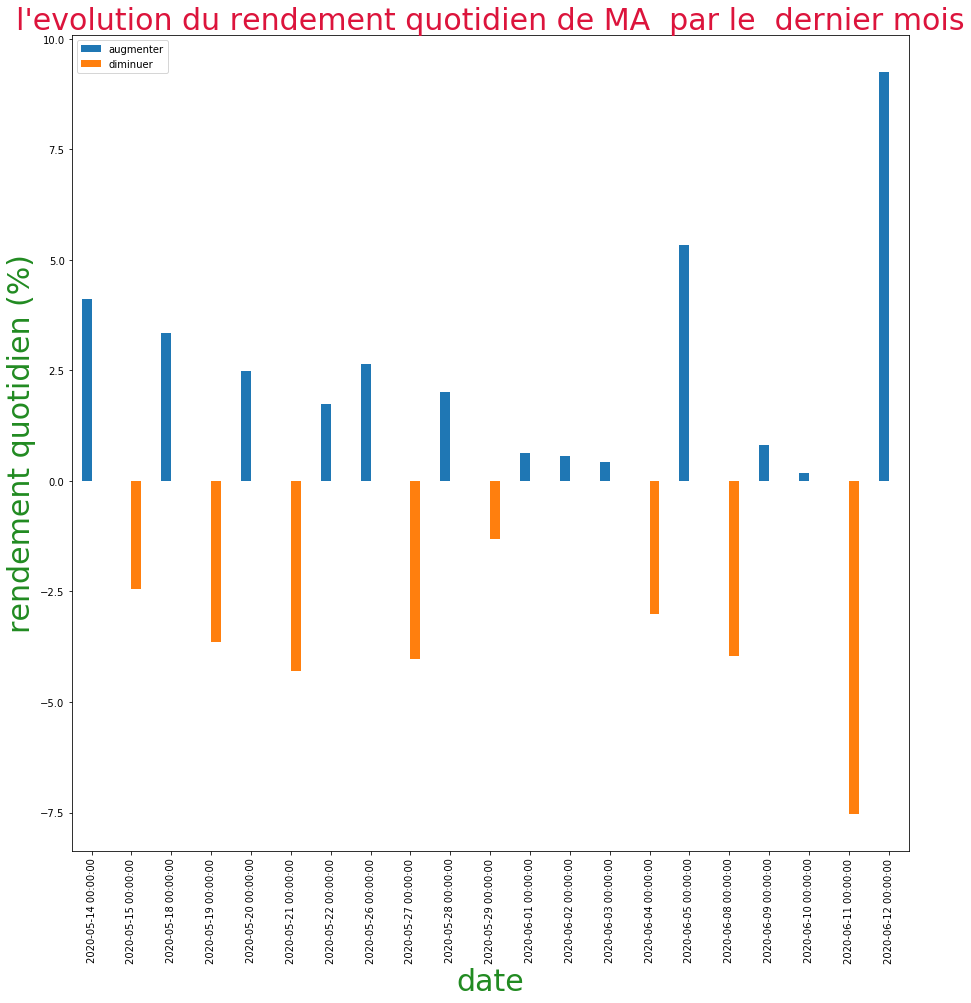

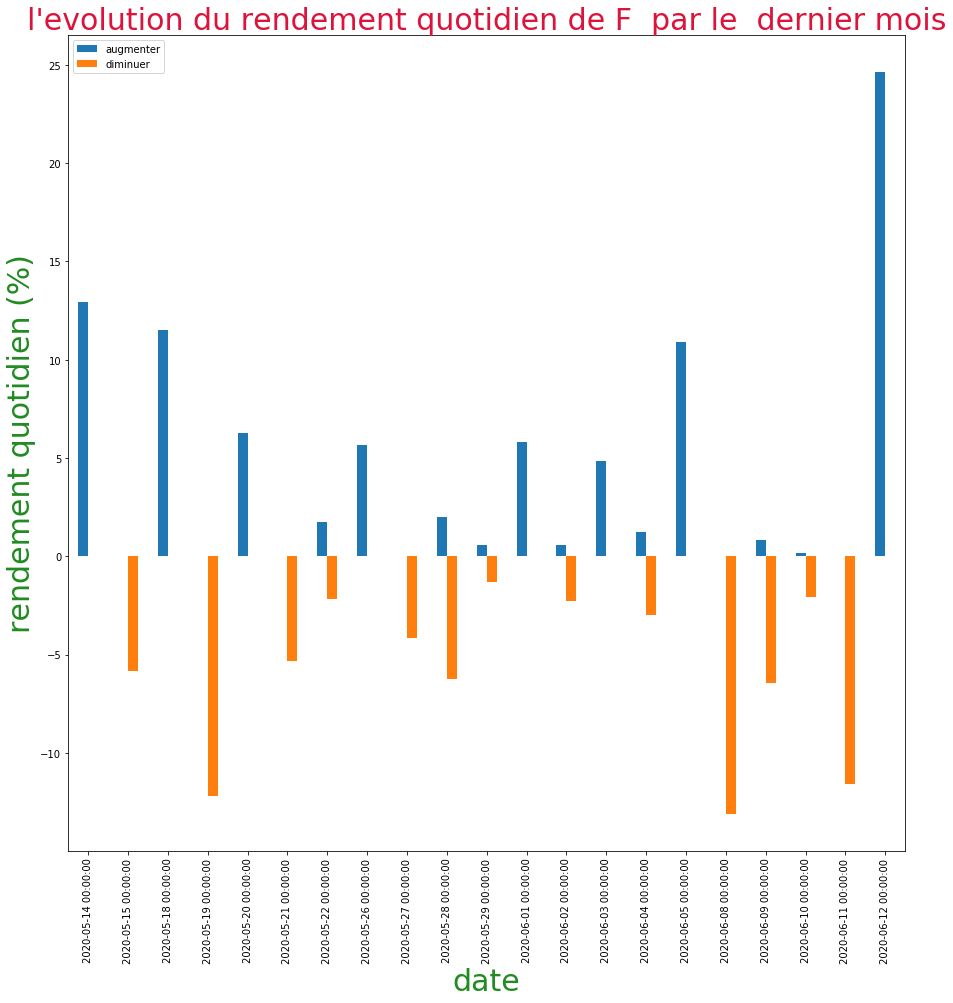

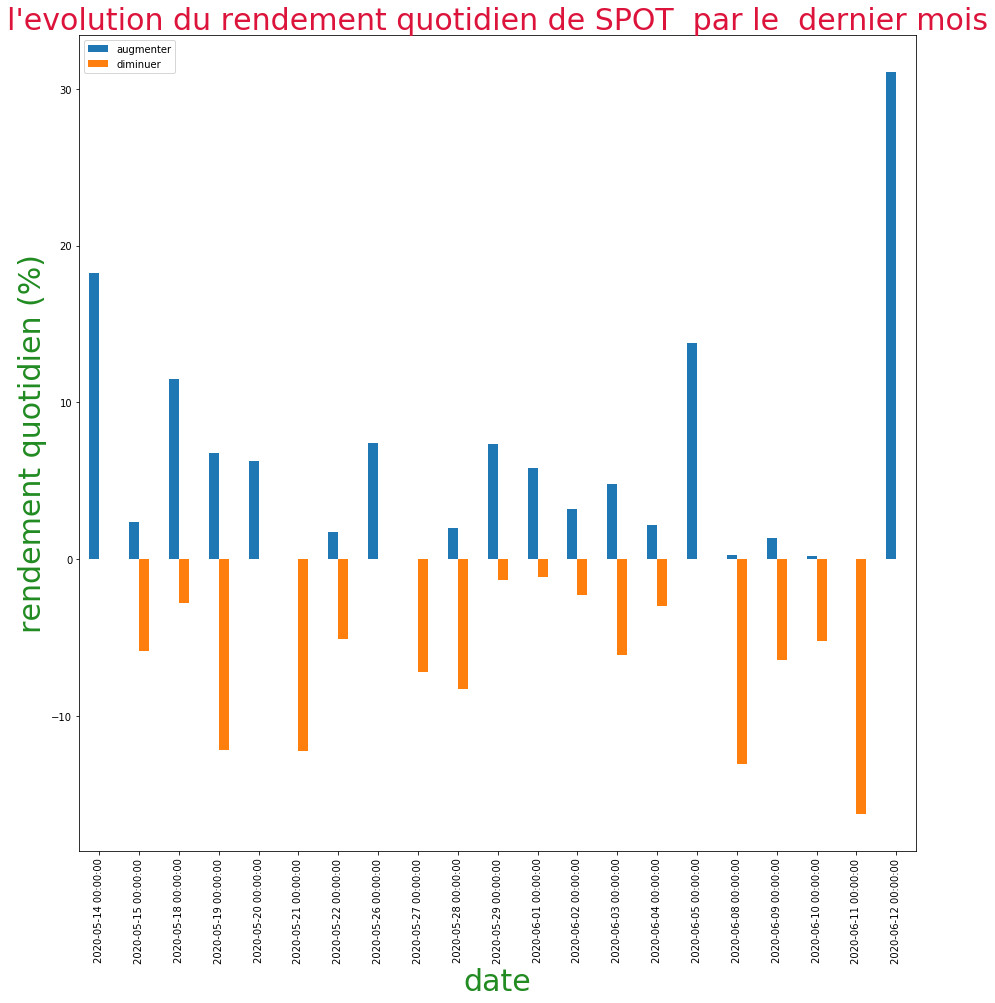

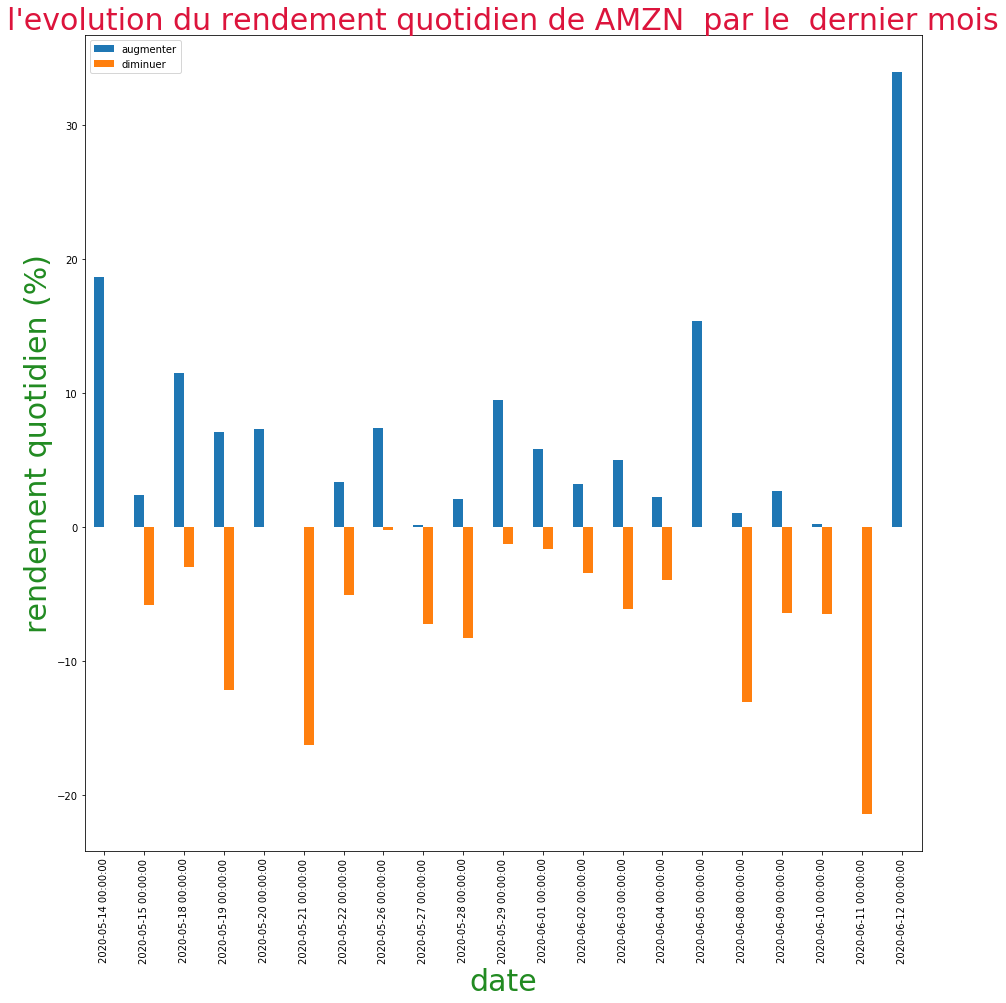

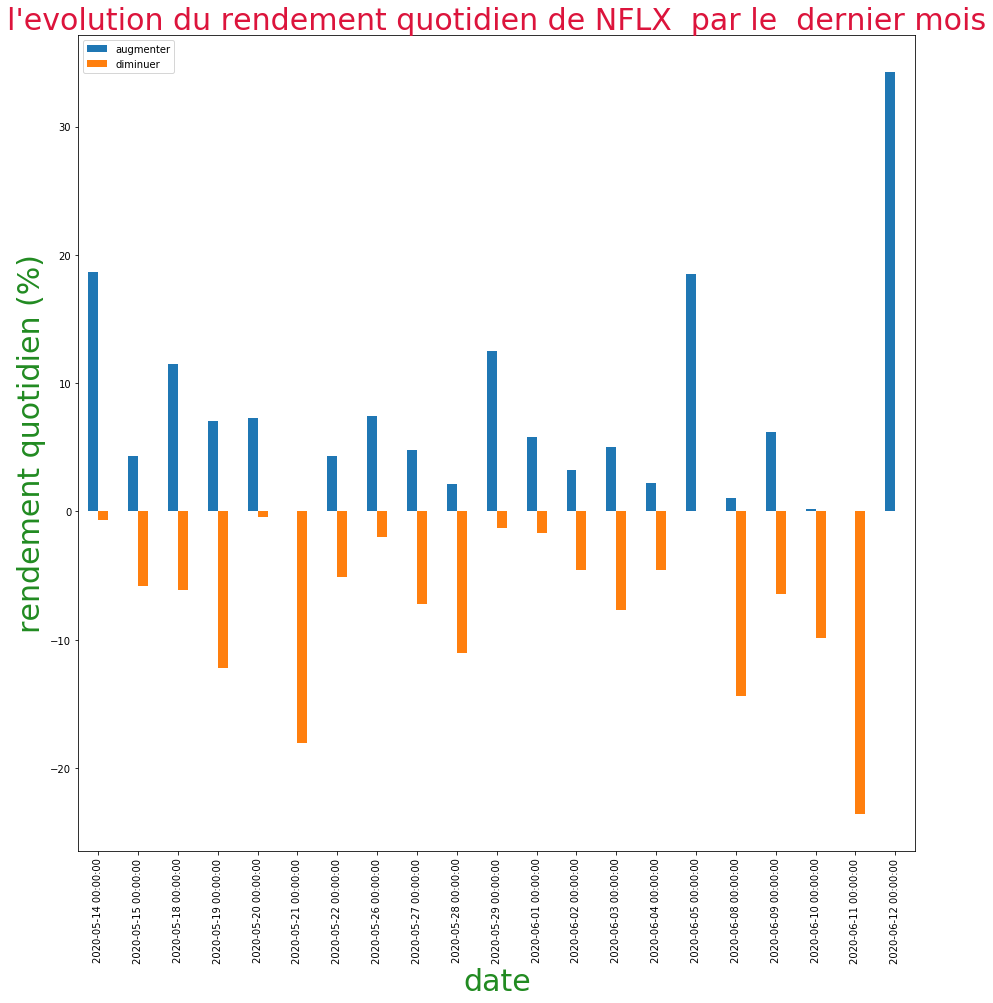

In [428]:
#rendement par jours[i] = rendement[i]-rendement[i-1]
re_copy=tab_re.copy()
re_copy['augmenter']=np.zeros(data.shape[0])
re_copy['diminuer']=np.zeros(data.shape[0])
for i in action_choisie:
    for j in range(1,data.shape[0]):
        if re_copy[i].diff()[j]>0:
            re_copy['augmenter'][j]+=re_copy[i].diff()[j]*100
        else:
            re_copy['diminuer'][j]+=re_copy[i].diff()[j]*100
    re_copy[['augmenter','diminuer']][data.shape[0]-21:data.shape[0]].plot.bar(figsize=(15,15))
    plt.ylabel('rendement quotidien (%)',fontsize=30,c='#228B22')
    plt.xlabel('date',fontsize=30,c='#228B22')
    plt.title(f'l\'evolution du rendement quotidien de {i}  par le  dernier mois',fontsize=30,c='#DC143C')
    plt.savefig(f'l\'evolution du rendement de {i}  par le  dernier mois')
    plt.show()